In [78]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Table of Contents

+ Dataset Description [↓↓↓](#dataset-description)
+ Data Preprocessing & Visualization [↓↓↓](#data-preprocessing--visualization)
    + Genres Preprocessing [↓↓↓](#genres-preprocessing)
    + Description Preprocessing [↓↓↓](#description-preprocessing)
+ Model Training [↓↓↓](#model-training)
    + Dataloader & Model [↓↓↓](#dataloader--model)
    + Training Loop [↓↓↓](#training-loop)
+ Comparative Study [↓↓↓](#comparative-study)
    + Dataset & Model [↓↓↓](#dataset--model)
    + Training [↓↓↓](#training)
    + Inference [↓↓↓](#inference)

# Dataset Description
<a id="dataset-description"></a>
[↑↑↑](#table-of-contents)

Dataset: [Best Books (10k) Multi-Genre Data](https://www.kaggle.com/datasets/ishikajohari/best-books-10k-multi-genre-data/data)

Description: Data from the "Books That Everyone Should Read At Least Once" list on Goodreads
Size: 10'000

Content
1. `Book` - Name of the book. Soemtimes this includes the details of the Series it belongs to inside a parenthesis. This information can be further extracted to analyse only series.
2. `Author` - Name of the book's Author
3. `Description` - The book's description as mentioned on Goodreads
4. `Genres` - Multiple Genres as classified on Goodreads. Could be useful for Multi-label classification or Content based recommendation and Clustering.
5. `Average Rating` - The average rating (Out of 5) given on Goodreads
6. `Number of Ratings` - The Number of users that have Ratings. (Not to be confused with reviews)
7. `URL` - The Goodreads URL for the book's details' page

**Task - Multi-Label Text Classification**

Text Features: `Description`

Target Classification: `Genres`

In [79]:
import pandas as pd

data = pd.read_csv("./goodreads_data.csv", sep=",", engine="python")
data.head(10) # Raw Data

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
5,5,The Little Prince,Antoine de Saint-Exupéry,A pilot stranded in the desert awakes one morn...,"['Classics', 'Fiction', 'Fantasy', 'Childrens'...",4.32,"1,924,063",https://www.goodreads.com/book/show/157993.The...
6,6,1984,George Orwell,The new novel by George Orwell is the major wo...,"['Classics', 'Fiction', 'Science Fiction', 'Dy...",4.19,"4,201,429",https://www.goodreads.com/book/show/61439040-1984
7,7,The Great Gatsby,F. Scott Fitzgerald,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"['Classics', 'Fiction', 'School', 'Historical ...",3.93,"4,839,642",https://www.goodreads.com/book/show/4671.The_G...
8,8,The Catcher in the Rye,J.D. Salinger,It's Christmas time and Holden Caulfield has j...,"['Classics', 'Fiction', 'Young Adult', 'Litera...",3.81,"3,315,881",https://www.goodreads.com/book/show/5107.The_C...
9,9,The Lord of the Rings,J.R.R. Tolkien,"One Ring to rule them all, One Ring to find th...","['Fantasy', 'Classics', 'Fiction', 'Adventure'...",4.52,"644,766",https://www.goodreads.com/book/show/33.The_Lor...


# Data Preprocessing & Visualization
[↑↑↑](#table-of-contents)

In [80]:
print("data shape \n", data.shape)
print("data columns \n", data.columns)

data shape 
 (10000, 8)
data columns 
 Index(['Unnamed: 0', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating',
       'Num_Ratings', 'URL'],
      dtype='object')


In [81]:
print("data info \n", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB
data info 
 None


In [82]:
print("all books count", data["Book"].size)
print("unique books count", data["Book"].unique().size)

all books count 10000
unique books count 9871


The data contains Null descriptions and duplicate books.

In [83]:
data = data.dropna()
data = data.drop_duplicates(subset=["Book"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9795 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   9795 non-null   int64  
 1   Book         9795 non-null   object 
 2   Author       9795 non-null   object 
 3   Description  9795 non-null   object 
 4   Genres       9795 non-null   object 
 5   Avg_Rating   9795 non-null   float64
 6   Num_Ratings  9795 non-null   object 
 7   URL          9795 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 688.7+ KB


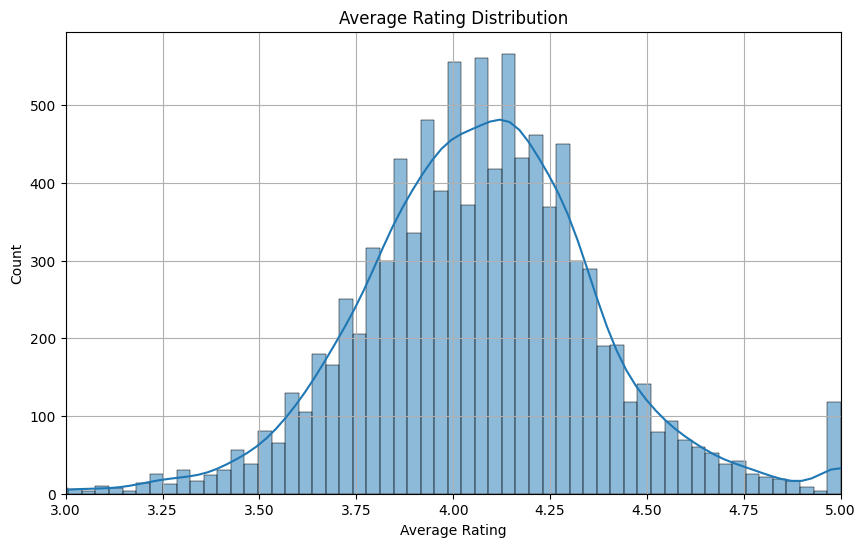

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data["Avg_Rating"], kde=True)
plt.title("Average Rating Distribution")
plt.xlabel("Average Rating")
plt.grid(True)
plt.xlim(left=3, right=5)
plt.show()

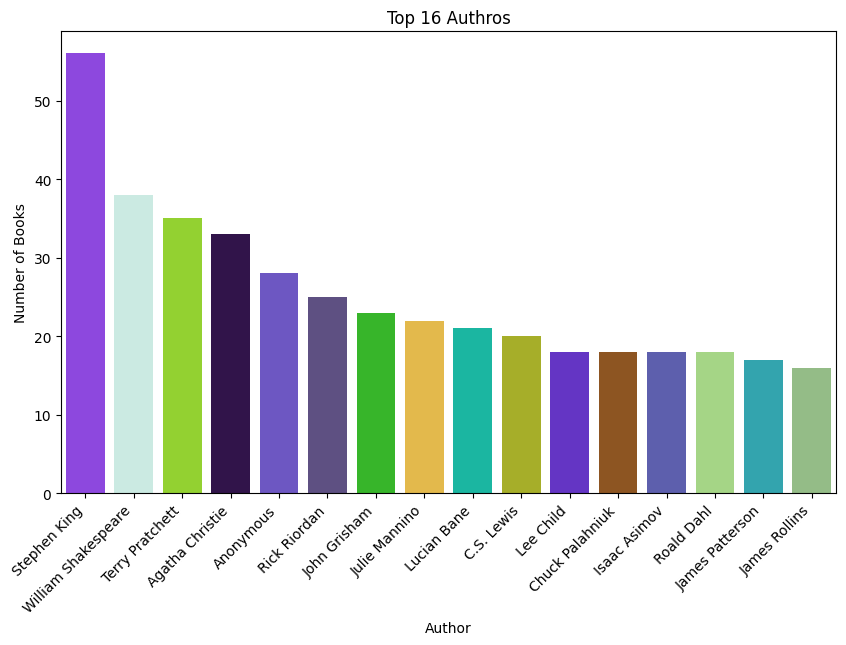

In [85]:
top_authors = data.groupby('Author').size().sort_values(ascending=False).head(16)
colors = np.random.rand(16, 3).tolist()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.index, y=top_authors.values, hue=top_authors.index, palette=colors)
plt.title("Top 16 Authros")
plt.ylabel("Number of Books")
plt.xticks(rotation=45, ha="right")
plt.show()

## Genres Preprocessing

In [86]:
import ast
from collections import Counter

data["Genres"] = data["Genres"].apply(ast.literal_eval)
all_genres = data["Genres"].sum()
genre_counts = Counter(all_genres)
genre_counts.most_common(24)

[('Fiction', 5595),
 ('Nonfiction', 2306),
 ('Fantasy', 2158),
 ('Classics', 2110),
 ('Romance', 1524),
 ('Young Adult', 1488),
 ('Historical Fiction', 1455),
 ('Mystery', 1339),
 ('Contemporary', 1255),
 ('Audiobook', 1196),
 ('Novels', 1153),
 ('Literature', 1099),
 ('Thriller', 1000),
 ('Historical', 925),
 ('Science Fiction', 827),
 ('History', 812),
 ('Philosophy', 736),
 ('Adventure', 731),
 ('Biography', 710),
 ('Self Help', 706),
 ('Crime', 695),
 ('Psychology', 688),
 ('Mystery Thriller', 655),
 ('Adult', 644)]

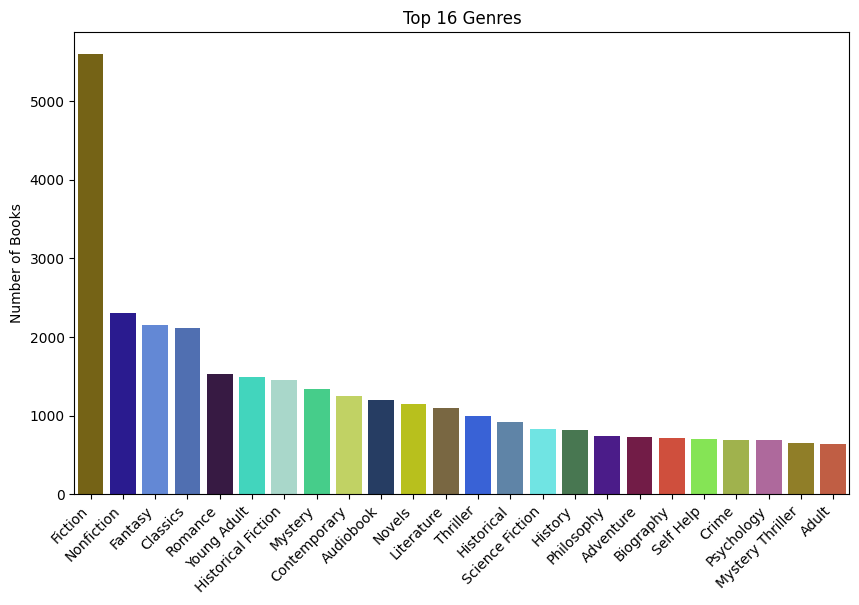

In [87]:
top_genres = dict(genre_counts.most_common(24))
colors = np.random.rand(24, 3).tolist()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.keys(), y=top_genres.values(), hue=list(top_genres.keys()), palette=colors)
plt.title("Top 16 Genres")
plt.ylabel("Number of Books")
plt.xticks(rotation=45, ha="right")
plt.show()

We keep only the 16 most popular genres. Books that are left without a single genre are discarded.

In [88]:
most_common_genres = [genre for genre, count in genre_counts.most_common(16)]
data["Genres"] = data["Genres"].apply(lambda genres: [genre for genre in genres if genre in most_common_genres])
print(data["Genres"].count())

print("\nClean Up\n")
data = data[data["Genres"].apply(lambda x: len(x) > 0)]
print(data["Genres"].count())

9795

Clean Up

8613


## Description Preprocessing

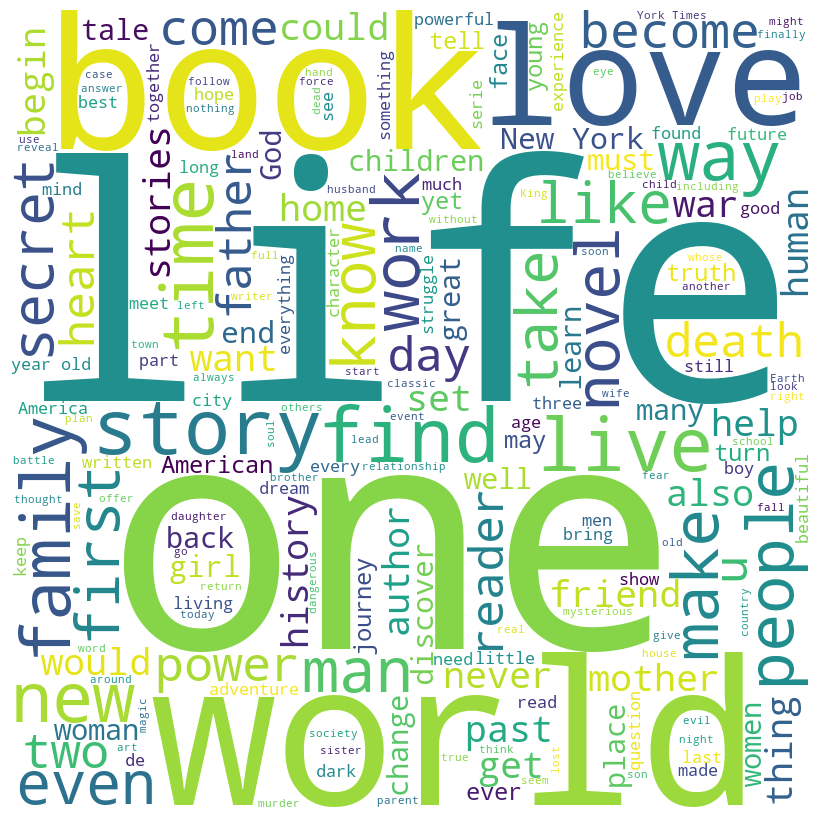

In [89]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))


text = " ".join(x for x in data["Description"])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords=STOPWORDS,
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = "white")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

There are non-English description lines in the dataset. Get rid of them too.

In [90]:
data["Description"].get(472)

'لكل قصة بداية وحكاية ونهاية ، وحياة كل إنسان رواية هو بطلها ومن خلالها يتشكل العالم من حولنا. ببناء مدهش يقدم أشرف العشماوي أحدث رواياته، قصص أبطاله الثلاثة تحكي حياتهم لكنها تشكل فصول الحكاية الأكبر، حكاية صالة المزاد التي يقتحم بها المؤلف عالمًا روائيًا جديدًا، كاشفاً خباياه وكواليسه وطرق الخداع التي تُجرى فيه، ودور يهود مصر في السيطرة عليه منذ العهد الملكي حتى السبعينيات . تتشابك خيوط حكايات الأبطال وتتعقد علاقاتهم الإنسانية، ليجذب العشماوي أطرافها بسلاسة فتنساب لتحكي أدق تفاصيل النفوس وتصطدم بصراعات تُفضي لجرائم ، وعندما تقترب الخيوط من نهاياتها ومع دَقة المزاد الثالثة الشهيرة التي تعلن موت رغبة وميلاد أخرى تتفجر المفاجآت لتتسع أذهاننا لتساؤلات بقدر ما تتفتح أعيننا على حقائق .. هل حياتنا تشبه المزاد؟ وماذا يتبقى من إنسانيتنا لو أصبح كل منا قطعة معروضة في صالة مزادات ينتظر دوره؟.'

In [91]:
import re

def text_preprocessing(text: str):
    text = text.lower()
    
    # replace points with space
    text = re.sub(r"[.]", " ", text)
    
    # remove all punct, digits and non-ASCII characters
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"[^\x00-\x7F]+", "", text)
    
    # remove stopwords
    text = " ".join([word for word in text.split() if word not in STOPWORDS])
    
    # remove redudant spaces
    text = re.sub(r"\s+", " ", text).strip()
    
    # stemming
    text = " ".join([nltk.stem.PorterStemmer().stem(word) for word in text.split()])
    
    return text

data["Description"] = data["Description"].apply(text_preprocessing)
data["Description"].head()

0    unforgett novel childhood sleepi southern town...
1    harri potter think ordinari boy rescu owl take...
2    sinc immedi success pride prejudic remain one ...
3    discov attic spent last year life ann frank re...
4    librarian note altern cover edit edit book far...
Name: Description, dtype: object

In [92]:
rows_to_drop = data["Description"].str.match(r'^[a-zA-Z0-9\s.,!?\'"“”‘’—–:;\-\(\)…/]+$', na=False)
print("rows with non-English descriptions: ", rows_to_drop[rows_to_drop == False].count())
data = data.drop(rows_to_drop[rows_to_drop==False].index)
data["Description"].count()

rows with non-English descriptions:  68


8545

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["Description"])

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data["Genres"])

# Model Training
[↑↑↑](#table-of-contents)

## Dataloader & Model

In [111]:
from sklearn.model_selection import train_test_split

X, Xt, y, yt = train_test_split(X, y, test_size=0.3, random_state=41)

In [112]:
import torch

class BooksDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.toarray(), dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


dataset = BooksDataset(X, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

In [127]:
import torch.nn as nn

class ClassificationNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(ClassificationNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 128),
            nn.ReLU(),                  
            nn.Linear(128, output_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

input_size = X.shape[1]
output_size = y.shape[1]
model = ClassificationNN(input_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
model.to(device)

cuda


ClassificationNN(
  (network): Sequential(
    (0): Linear(in_features=52797, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=512, out_features=128, bias=True)
    (4): ReLU()
    (5): Linear(in_features=128, out_features=16, bias=True)
    (6): Sigmoid()
  )
)

## Training Loop
<a id=training-loop></a>
[](#table-of-contents)

In [128]:
import time

model = torch.load("./checkpoints/nlp-model.h5", weights_only=False)

# epochs = 25
# model.train()

# for epoch in range(epochs):
#     epoch_loss = 0.0
#     for batch_X, batch_y in dataloader:
#         batch_X, batch_y = batch_X.to(device), batch_y.to(device)
#         outputs = model(batch_X)
#         loss = criterion(outputs, batch_y)

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         epoch_loss += loss.item()

#     print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(dataloader):.4f}")
#     torch.save(model, "checkpoints/nlp-model.h5")

Epoch 1/25, Loss: 0.1581
Epoch 2/25, Loss: 0.1162
Epoch 3/25, Loss: 0.0857
Epoch 4/25, Loss: 0.0558
Epoch 5/25, Loss: 0.0373
Epoch 6/25, Loss: 0.0250
Epoch 7/25, Loss: 0.0177
Epoch 8/25, Loss: 0.0133
Epoch 9/25, Loss: 0.0106
Epoch 10/25, Loss: 0.0088
Epoch 11/25, Loss: 0.0072
Epoch 12/25, Loss: 0.0061
Epoch 13/25, Loss: 0.0054
Epoch 14/25, Loss: 0.0047
Epoch 15/25, Loss: 0.0044
Epoch 16/25, Loss: 0.0039
Epoch 17/25, Loss: 0.0037
Epoch 18/25, Loss: 0.0034
Epoch 19/25, Loss: 0.0031
Epoch 20/25, Loss: 0.0030
Epoch 21/25, Loss: 0.0027
Epoch 22/25, Loss: 0.0026
Epoch 23/25, Loss: 0.0025
Epoch 24/25, Loss: 0.0024
Epoch 25/25, Loss: 0.0023


In [129]:
# helper functions

def predict_with_threshold(outputs : torch.Tensor, threshold=0.5) -> torch.Tensor:
    predictions = (outputs > threshold).float()
    
    for i in range(predictions.shape[0]):
        if predictions[i].sum() == 0:
            max_class = torch.argmax(outputs[i])
            predictions[i, max_class] = 1.0
            
    return predictions

Test Books:

[The Last Murder at the End of the World](https://www.goodreads.com/book/show/136276877-the-last-murder-at-the-end-of-the-world)

In [130]:
description = "Solve the murder to save what's left of the world.  Outside the island there is nothing: the world was destroyed by a fog that swept the planet, killing anyone it touched.  On the island: it is idyllic. One hundred and twenty-two villagers and three scientists, living in peaceful harmony. The villagers are content to fish, farm and feast, to obey their nightly curfew, to do what they're told by the scientists.  Until, to the horror of the islanders, one of their beloved scientists is found brutally stabbed to death. And then they learn that the murder has triggered a lowering of the security system around the island, the only thing that was keeping the fog at bay. If the murder isn't solved within 107 hours, the fog will smother the island—and everyone on it.  But the security system has also wiped everyone's memories of exactly what happened the night before, which means that someone on the island is a murderer—and they don't even know it.  And the clock is ticking.  From the bestselling author of The 7 1/2 Deaths of Evelyn Hardcastle and The Devil and the Dark Water comes an inventive, high-concept murder mystery: an ingenious puzzle, an extraordinary backdrop, and an audacious solution."
genres = [
    "Mystery",
    "Science Fiction",
    "Fiction",
    "Thriller",
    "Mystery Thriller",
    "Audiobook",
    "Adult",
    "Crime"
]

description = text_preprocessing(description)
vector = vectorizer.transform([description])
with torch.no_grad():
    outputs = model(torch.tensor(vector.toarray(), dtype=torch.float32).to(device))
    pred = predict_with_threshold(outputs, 0.25)
    
    print(sorted(mlb.inverse_transform(pred.cpu())))
    print(sorted(genres))

[('Audiobook', 'Fantasy', 'Fiction', 'Mystery', 'Science Fiction', 'Thriller')]
['Adult', 'Audiobook', 'Crime', 'Fiction', 'Mystery', 'Mystery Thriller', 'Science Fiction', 'Thriller']


In [131]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

test_dataset = BooksDataset(Xt, yt)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64)

true_labels = []
predicted_labels = []
threshold = 0.5

model.eval()
with torch.no_grad():
    for batch_X, batch_y in test_dataloader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        
        pred = predict_with_threshold(outputs, threshold)
        
        true_labels.extend(batch_y.cpu().tolist())
        predicted_labels.extend(pred.cpu().tolist())

label_accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Exact Match Accuracy Score: {label_accuracy:.4f} \n")
print(classification_report(true_labels, predicted_labels, target_names=mlb.classes_))

Exact Match Accuracy Score: 0.2266 

                    precision    recall  f1-score   support

         Audiobook       0.57      0.12      0.20       385
          Classics       0.73      0.60      0.66       616
      Contemporary       0.57      0.33      0.41       376
           Fantasy       0.81      0.66      0.73       649
           Fiction       0.87      0.88      0.87      1675
        Historical       0.72      0.31      0.43       267
Historical Fiction       0.63      0.51      0.57       415
           History       0.80      0.37      0.50       234
        Literature       0.65      0.35      0.45       319
           Mystery       0.83      0.61      0.70       394
        Nonfiction       0.86      0.80      0.83       683
            Novels       0.52      0.23      0.32       332
           Romance       0.68      0.49      0.57       458
   Science Fiction       0.78      0.38      0.51       232
          Thriller       0.78      0.43      0.55       321
  

# Comparative Study
[↑↑↑](#table-of-contents)

## Dataset & Model

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

vectorizer = TfidfVectorizer()
X = data["Description"]

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data["Genres"]).tolist()

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data["Description"].tolist(), y, test_size=0.3, random_state=42
)

In [134]:
from datasets import Dataset
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

train_dataset = Dataset.from_dict({"text": X_train, "labels": y_train})
test_dataset = Dataset.from_dict({"text": X_test, "labels": y_test})

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)
train_dataset = train_dataset.remove_columns(["text"])
test_dataset = test_dataset.remove_columns(["text"])
train_dataset.set_format("torch")
test_dataset.set_format("torch")
train_dataset = train_dataset.map(lambda x: {"labels": torch.tensor(x["labels"], dtype=torch.float32)})
test_dataset = test_dataset.map(lambda x: {"labels": torch.tensor(x["labels"], dtype=torch.float32)})

Map:   0%|          | 0/5981 [00:00<?, ? examples/s]

Map:   0%|          | 0/2564 [00:00<?, ? examples/s]

Map:   0%|          | 0/5981 [00:00<?, ? examples/s]

Map:   0%|          | 0/2564 [00:00<?, ? examples/s]

In [135]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = AutoModelForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path="distilbert-base-uncased", num_labels=len(mlb.classes_), problem_type="multi_label_classification"
)

model = model.from_pretrained("./checkpoints/bert")
model.to(device)
pass

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Training

In [136]:
from transformers import TrainingArguments, Trainer
import torch.nn as nn


class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        inputs = {k: v.to(device) for k, v in inputs.items()}
        labels = inputs.pop("labels")
        model.to(device)
        outputs = model(**inputs)
        logits = outputs.logits

        loss_fct = nn.BCEWithLogitsLoss()
        loss = loss_fct(logits, labels.float())

        return (loss, outputs) if return_outputs else loss
    
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = (logits > 0).astype(int)
    return classification_report(labels, predictions, target_names=mlb.classes_, output_dict=True)

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# trainer.train()

trainer.model.save_pretrained("./checkpoints/bert")

In [141]:
description = "Solve the murder to save what's left of the world.  Outside the island there is nothing: the world was destroyed by a fog that swept the planet, killing anyone it touched.  On the island: it is idyllic. One hundred and twenty-two villagers and three scientists, living in peaceful harmony. The villagers are content to fish, farm and feast, to obey their nightly curfew, to do what they're told by the scientists.  Until, to the horror of the islanders, one of their beloved scientists is found brutally stabbed to death. And then they learn that the murder has triggered a lowering of the security system around the island, the only thing that was keeping the fog at bay. If the murder isn't solved within 107 hours, the fog will smother the island—and everyone on it.  But the security system has also wiped everyone's memories of exactly what happened the night before, which means that someone on the island is a murderer—and they don't even know it.  And the clock is ticking.  From the bestselling author of The 7 1/2 Deaths of Evelyn Hardcastle and The Devil and the Dark Water comes an inventive, high-concept murder mystery: an ingenious puzzle, an extraordinary backdrop, and an audacious solution."
genres = [
    "Mystery",
    "Science Fiction",
    "Fiction",
    "Thriller",
    "Mystery Thriller",
    "Audiobook",
    "Adult",
    "Crime"
]

description = text_preprocessing(description)
inputs = tokenizer(description, return_tensors="pt", padding=True, truncation=True, max_length=128)
inputs = {k: v.to(device) for k, v in inputs.items()}
outputs = trainer.model(**inputs)
predicted_genres = (outputs.logits > 0.25).squeeze().int().tolist()
print("Predicted genres:", sorted([mlb.classes_[i] for i, label in enumerate(predicted_genres) if label]))
print(sorted(genres))

Predicted genres: ['Fiction', 'Mystery', 'Thriller']
['Adult', 'Audiobook', 'Crime', 'Fiction', 'Mystery', 'Mystery Thriller', 'Science Fiction', 'Thriller']


## Inference

In [138]:
from sklearn.metrics import accuracy_score, classification_report
import torch

predictions = trainer.predict(test_dataset)

logits = predictions.predictions
true_labels = predictions.label_ids
predicted_labels = (torch.sigmoid(torch.tensor(logits)) > 0.5).numpy()

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Exact Match Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=mlb.classes_))

  0%|          | 0/161 [00:00<?, ?it/s]

Exact Match Accuracy: 0.1817
Classification Report:
                    precision    recall  f1-score   support

         Audiobook       0.00      0.00      0.00       359
          Classics       0.76      0.46      0.57       658
      Contemporary       0.66      0.28      0.40       366
           Fantasy       0.82      0.66      0.73       658
           Fiction       0.84      0.93      0.89      1684
        Historical       0.81      0.09      0.16       289
Historical Fiction       0.70      0.36      0.48       444
           History       0.89      0.28      0.43       251
        Literature       0.64      0.35      0.46       336
           Mystery       0.83      0.44      0.58       407
        Nonfiction       0.87      0.84      0.85       670
            Novels       0.00      0.00      0.00       351
           Romance       0.69      0.47      0.56       447
   Science Fiction       0.94      0.14      0.24       242
          Thriller       0.78      0.39      0.

In [108]:
from sklearn.metrics import accuracy_score, classification_report
import tqdm

test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=16)

model.eval()

predicted_labels = []
true_labels = []

with torch.no_grad():
    for batch in tqdm.tqdm(test_dataloader):
        true_labels.extend(batch['labels'].cpu().numpy())
        batch = {k: v.to(device) for k, v in batch.items() if k != "labels"}
        outputs = model(**batch)
        logits = outputs.logits
        preds = torch.sigmoid(logits) > 0.5
        
        predicted_labels.extend(preds.cpu().numpy())

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Exact Match Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=mlb.classes_))


100%|██████████| 161/161 [00:10<00:00, 14.76it/s]

Exact Match Accuracy: 0.1817
Classification Report:
                    precision    recall  f1-score   support

         Audiobook       0.00      0.00      0.00       359
          Classics       0.76      0.46      0.57       658
      Contemporary       0.66      0.28      0.40       366
           Fantasy       0.82      0.66      0.73       658
           Fiction       0.84      0.93      0.89      1684
        Historical       0.81      0.09      0.16       289
Historical Fiction       0.70      0.36      0.48       444
           History       0.89      0.28      0.43       251
        Literature       0.64      0.35      0.46       336
           Mystery       0.83      0.44      0.58       407
        Nonfiction       0.87      0.84      0.85       670
            Novels       0.00      0.00      0.00       351
           Romance       0.69      0.47      0.56       447
   Science Fiction       0.94      0.14      0.24       242
          Thriller       0.78      0.39      0.